In [28]:
# Find top connections in multi
import re
import numpy as np

ageNback = re.findall(r'\d+',
'''
20011 26700 14632 31233 13492 30089  7096 28263   196 31380
1290  7096 20423 30089 18970 14632 13492 28263   196 31380
2648 30891 31380 17427 12661 32438 20011 28718 20623 17428
2648 32438 31380 17427  2142 30891 20362  1019 20623 17428
18797 19847 31561 16951 20538  7192 17427 19341  1125  1290
33772 14906  7192 19341  4832 17427 32438  1290  1125  5003
''')

ageNback = [int(feat) for feat in ageNback]

print(len(ageNback))
print(ageNback)
uniq, uniqIndices, uniqCounts = np.unique(ageNback, return_index=True, return_counts=True)
idcs = np.argsort(uniqCounts)

print(uniq)
print(uniqIndices)
print(uniqCounts)
print(uniqCounts[idcs[-10:]])
print(uniqIndices[idcs[-10:]])

60
[20011, 26700, 14632, 31233, 13492, 30089, 7096, 28263, 196, 31380, 1290, 7096, 20423, 30089, 18970, 14632, 13492, 28263, 196, 31380, 2648, 30891, 31380, 17427, 12661, 32438, 20011, 28718, 20623, 17428, 2648, 32438, 31380, 17427, 2142, 30891, 20362, 1019, 20623, 17428, 18797, 19847, 31561, 16951, 20538, 7192, 17427, 19341, 1125, 1290, 33772, 14906, 7192, 19341, 4832, 17427, 32438, 1290, 1125, 5003]
[  196  1019  1125  1290  2142  2648  4832  5003  7096  7192 12661 13492
 14632 14906 16951 17427 17428 18797 18970 19341 19847 20011 20362 20423
 20538 20623 26700 28263 28718 30089 30891 31233 31380 31561 32438 33772]
[ 8 37 48 10 34 20 54 59  6 45 24  4  2 51 43 23 29 40 14 47 41  0 36 12
 44 28  1  7 27  5 21  3  9 42 25 50]
[2 1 2 3 1 2 1 1 2 2 1 2 2 1 1 4 2 1 1 2 1 2 1 1 1 2 1 2 1 2 2 1 4 1 3 1]
[2 2 2 2 2 2 3 3 4 4]
[ 6 47 45 29  2  8 10 25  9 23]


In [1]:
# Find top connections in multi
import re
import numpy as np

combined = [[], [], [], [], [], [], [], [], []]
files = ['', '_2', '_3']

for file in files:
    with open(f'../../Work/LatentSim/MultiConn/multiconn10{file}.txt', 'r') as f:
        feats = f.readlines()
        feats = [re.findall(r'\d+', lst) for lst in feats]
        feats = [[int(conn) for conn in lst] for lst in feats]
        for i in range(len(combined)):
            combined[i] += feats[i]

combined = [np.array(feat) for feat in combined]
top = []

for i in [0,1,3,4,6,7]:
    feat = combined[i]
    # print(feat)

    uniq, uniqIndices, uniqCounts = np.unique(feat, return_index=True, return_counts=True)
    idcs = np.argsort(uniqCounts)
    top.append(feat[uniqIndices[idcs[-10:]]])
    print(uniqCounts[idcs[-10:]])
    print(top[-1])

[ 8  8 10 11 12 12 13 20 27 30]
[ 8802 26287 26996 32438 20011 33884 20364 31380   196  1290]
[ 6  6  6  7  7  7  8  8  8 15]
[30527 12266 18659   268 11303 31128   783  1834 18108   646]
[10 10 10 11 12 12 13 17 17 22]
[18230 13398 25189 17494  1829   923 21537 20365 17428  2428]
[ 6  7  7  7  7  8  8  9  9 10]
[  606 34569 25332  4067 24192  3470 31488 18250 26897  2457]
[ 7  8  8  8  9 10 10 11 11 12]
[  923 28263  1125 20365 31380   166 21537  1290 18812 20364]
[ 6  6  6  6  6  7  9 11 12 18]
[18117 24192 18250 20604 26897   245  4067 34569 31128  2457]


In [56]:
a, b = np.triu_indices(264, k=1)

print(a[1290],b[1290])

4 249


In [96]:
for i in feat[uniqIndices[idcs[-20:]]]:
    print(a[i],b[i])

34 77
7 247
44 47
115 249
149 164
84 138
39 243
129 180
217 232
186 250
81 136
118 180
82 88
95 180
138 195
0 246
15 243
246 253
178 246
9 136


In [2]:
import pickle

with open('../../PNC_Good/MegaMeta3.pkl', 'rb') as f: 
    meta = pickle.load(f)
    
print('Complete')

Complete


In [3]:
with open('../../Work/LatentSim/Splits.pkl', 'rb') as f:
    keys, groups = pickle.load(f)
    
print(len(keys))
print(len(groups[0][0])+len(groups[0][1]))
print('Complete')

620
620
Complete


In [4]:
import numpy as np

nback = np.stack([meta[key]['nback'] for key in keys])
emoid = np.stack([meta[key]['emoid'] for key in keys])

print(nback.shape)
print(emoid.shape)

(620, 264, 231)
(620, 264, 210)


In [5]:
from nilearn.connectome import ConnectivityMeasure

def getFC(timeSeries, kind='correlation', transpose=True):
    connMeasure = ConnectivityMeasure(kind=kind)
    if transpose:
        timeSeries = np.transpose(timeSeries, axes=(0,2,1))
    return connMeasure.fit_transform(timeSeries)

nback_p = getFC(nback)
emoid_p = getFC(emoid)

print(nback_p.shape)

(620, 264, 264)


In [6]:
import torch

def convertTorch(p):
    t = torch.from_numpy(p).float()
    u = []
    for i in range(t.shape[0]):
        u.append(t[i][torch.triu_indices(264,264,offset=1).unbind()])
    return torch.stack(u).cuda()

nback_p_t = convertTorch(nback_p)
emoid_p_t = convertTorch(emoid_p)

print(nback_p_t.shape)
print(emoid_p_t.shape)
print('Complete')

torch.Size([620, 34716])
torch.Size([620, 34716])
Complete


In [7]:
mu_nback = torch.mean(nback_p_t, dim=0, keepdim=True)
mu_emoid = torch.mean(emoid_p_t, dim=0, keepdim=True)
std_nback = torch.std(nback_p_t, dim=0, keepdim=True)
std_emoid = torch.std(emoid_p_t, dim=0, keepdim=True)

nback_p_t = (nback_p_t - mu_nback)/std_nback
emoid_p_t = (emoid_p_t - mu_emoid)/std_emoid

print('Norm complete')

Norm complete


In [8]:
print(torch.min(nback_p_t[:,420:422],dim=0))
print(torch.min(emoid_p_t[:,420:422],dim=0))

torch.return_types.min(
values=tensor([-2.2998, -3.0133], device='cuda:0'),
indices=tensor([603, 350], device='cuda:0'))
torch.return_types.min(
values=tensor([-2.7284, -3.0616], device='cuda:0'),
indices=tensor([351,  33], device='cuda:0'))


In [9]:
age = np.stack([meta[key]['AgeInMonths'] for key in keys])
gen = np.stack([np.array([meta[key]['Gender'] == 'M', meta[key]['Gender'] == 'F']) for key in keys]).astype(int)
wrt = np.stack([meta[key]['wratStd'] for key in keys])

print(age.shape)
print(gen.shape)
print(wrt.shape)

(620,)
(620, 2)
(620,)


In [10]:
age_t = torch.from_numpy(age).float().cuda()
gen_t = torch.from_numpy(gen).float().cuda()
wrt_t = torch.from_numpy(wrt).float().cuda()

print('Complete')

Complete


In [39]:
import torch.nn as nn
import torch.nn.functional as F
import time

ceLoss = torch.nn.CrossEntropyLoss()
mseLoss = torch.nn.MSELoss()

rmse = []

def allBelowThresh(losses, thresh):
    for loss,thr in zip(losses, thresh):
        if loss > thr:
            return False
    return True

def mask(e):
    return e - torch.diag(torch.diag(e.detach()))

def arith(n):
    return int(n*(n+1)/2)

def getAvg(res, nTasks):
    nPara = int(len(res)/nTasks)
    avg = nTasks*[0]
    for p in range(nPara):
        for t in range(nTasks):
            avg[t] += res[p*nTasks+t]/nPara
    return avg

class LatSim(nn.Module):
    def __init__(self, nTasks, inp, dp=0.5, edp=0.1, wInit=1e-4, dim=2, temp=1):
        super(LatSim, self).__init__()
        self.nTasks = nTasks
        self.w = nn.Parameter(wInit*torch.randn(2*nTasks,inp.shape[-1],dim).float().cuda())
        self.dp = nn.Dropout(p=dp)
        self.edp = nn.Dropout(p=edp)
        self.t = temp if isinstance(temp, list) else nTasks*[temp]
    
    def getLatentsAndEdges(self, x, i, w=None):
        if w is None:
            w = self.w[i]
        e = 1e-10
        z = x@w
        e = e+z@z.T
        return z, e
        
    def forward(self, x, ys, testIdcs=None):
        x = self.dp(x)
        res = []
        es = []
        zs = []
        for para in range(2):
            for i,y in enumerate(ys):
                # z, e = self.getLatentsAndEdges(x, i)
                z, e = self.getLatentsAndEdges(x[:,para], i+para*nTasks)
                zs.append(z)
                if testIdcs is not None:
                    e[:,testIdcs] = 0
                e = mask(e)
                # es.append(e.clone())
                e = self.edp(e)
                e[e == 0] = float('-inf')
                e = F.softmax(e/self.t[i], dim=1)
                res.append(e@y)
        return res, es, zs

def validate(model, X, ys, testIdcs):
    model.eval()
    losses = []
    with torch.no_grad():
        res, _, _ = model(X, ys, testIdcs)
        # for r,y in zip(res, ys):
        for r,y in zip(getAvg(res, nTasks), ys):
            if y.dim() == 1:
                loss = mseLoss(r[testIdcs], y[testIdcs]).cpu().numpy()**0.5
                losses.append(loss)
            else:
                corr = (torch.argmax(r, dim=1) == torch.argmax(y, dim=1))[testIdcs]
                loss = torch.sum(corr)/len(testIdcs)
                losses.append(loss)
    model.train()
    return losses

nEpochs = 2000
pPeriod = 100
thresh = [20] #[20,0.3,10]
regParam = 1e2

for nIdcs in range(1,2):
    for grp in range(10):
        trainIdcs = groups[grp][0][0:496]
        trainValidIdcs = groups[grp][0]
        validIdcs = np.arange(496,len(trainValidIdcs))
        testIdcs = groups[grp][1]
        
        X0 = nback_p_t[:,combined[0][-nIdcs:]]
        X1 = emoid_p_t[:,combined[0][-nIdcs:]]

#         X0 = nback_p_t[:,np.array([10372,
# 2648,
# 5583,
# 6732,
# 20011,
# 196,
# 28718,
# 18970])]
#         X1 = emoid_p_t[:,np.array([2648,
# 10372,
# 5583,
# 32438,
# 20011,
# 33816,
# 18970,
# 6732])]

        X = torch.stack([X0, X1], dim=1)
        Xt = X[trainIdcs]
        Xtv = X[trainValidIdcs]

        yy = [age_t]
        yt = [age_t[trainIdcs]]
        ytv = [age_t[trainValidIdcs]]

        nTasks = 1

        sim = LatSim(nTasks, X, dp=0, edp=0, wInit=1e-4, dim=2, temp=1)
        optim = torch.optim.Adam(sim.parameters(), lr=5e-4, weight_decay=5e-4)

        validLoss = [[] for _ in range(nTasks)]

        for epoch in range(nEpochs):
            optim.zero_grad()
            res, _, zs = sim(Xt, yt)
            loss = []
            for r,y in zip(res+getAvg(res,nTasks), yt):
              # for r,y in zip(res, yt):
                if y.dim() > 1:
                    loss.append(regParam*ceLoss(r, y))
                else:
                    loss.append(mseLoss(r, y))
            sum(loss).backward()
            optim.step()
            if epoch % pPeriod == 0 or epoch == nEpochs-1 or allBelowThresh(loss[0:nTasks], thresh):
                print(f'epoch {epoch} loss={loss}')
                losses = validate(sim, Xtv, ytv, validIdcs)
                for i,lss in enumerate(losses):
                    if (len(validLoss[i]) == 0 or 
                            (yy[i].dim() == 1 and lss < min(validLoss[i])) or 
                            (yy[i].dim() > 1 and lss > max(validLoss[i]))):
                        print(f'New best validation epoch {epoch} {i} loss={lss}')
                        torch.save(sim.state_dict(), f'../../Work/LatentSim/sim.pyt')
                        validLoss[i].append(float(lss))
                if allBelowThresh(loss[0:nTasks], thresh):
                    print('Early stopping')
                    break

        finalLoss = []

        for i in range(nTasks):
            sim.load_state_dict(torch.load(f'../../Work/LatentSim/sim.pyt'))
            loss = validate(sim, X, yy, testIdcs)
            finalLoss.append(float(loss[i]))

        rmse.append(finalLoss)

        print(f'FINISHED {rmse}')

epoch 0 loss=[tensor(1514.7156, device='cuda:0', grad_fn=<MseLossBackward0>)]
New best validation epoch 0 0 loss=44.58447265625
epoch 100 loss=[tensor(1514.1028, device='cuda:0', grad_fn=<MseLossBackward0>)]
New best validation epoch 100 0 loss=44.58201217651367
epoch 200 loss=[tensor(1511.8286, device='cuda:0', grad_fn=<MseLossBackward0>)]
New best validation epoch 200 0 loss=44.57332992553711
epoch 300 loss=[tensor(1508.1879, device='cuda:0', grad_fn=<MseLossBackward0>)]
New best validation epoch 300 0 loss=44.560646057128906
epoch 400 loss=[tensor(1503.8433, device='cuda:0', grad_fn=<MseLossBackward0>)]
New best validation epoch 400 0 loss=44.54837417602539
epoch 500 loss=[tensor(1499.5184, device='cuda:0', grad_fn=<MseLossBackward0>)]
New best validation epoch 500 0 loss=44.54193115234375
epoch 600 loss=[tensor(1495.7802, device='cuda:0', grad_fn=<MseLossBackward0>)]
epoch 700 loss=[tensor(1492.9734, device='cuda:0', grad_fn=<MseLossBackward0>)]
epoch 800 loss=[tensor(1491.2467, de

epoch 1100 loss=[tensor(1484.2593, device='cuda:0', grad_fn=<MseLossBackward0>)]
epoch 1200 loss=[tensor(1484.2549, device='cuda:0', grad_fn=<MseLossBackward0>)]
epoch 1300 loss=[tensor(1484.2545, device='cuda:0', grad_fn=<MseLossBackward0>)]
epoch 1400 loss=[tensor(1484.2546, device='cuda:0', grad_fn=<MseLossBackward0>)]
epoch 1500 loss=[tensor(1484.2545, device='cuda:0', grad_fn=<MseLossBackward0>)]
epoch 1600 loss=[tensor(1484.2545, device='cuda:0', grad_fn=<MseLossBackward0>)]
epoch 1700 loss=[tensor(1484.2545, device='cuda:0', grad_fn=<MseLossBackward0>)]
epoch 1800 loss=[tensor(1484.2545, device='cuda:0', grad_fn=<MseLossBackward0>)]
epoch 1900 loss=[tensor(1484.2545, device='cuda:0', grad_fn=<MseLossBackward0>)]
epoch 1999 loss=[tensor(1484.2545, device='cuda:0', grad_fn=<MseLossBackward0>)]
FINISHED [[37.45708465576172], [42.410770416259766], [37.34234619140625], [38.31320571899414]]
epoch 0 loss=[tensor(1484.8062, device='cuda:0', grad_fn=<MseLossBackward0>)]
New best validati

epoch 1000 loss=[tensor(1505.1980, device='cuda:0', grad_fn=<MseLossBackward0>)]
epoch 1100 loss=[tensor(1505.1401, device='cuda:0', grad_fn=<MseLossBackward0>)]
epoch 1200 loss=[tensor(1505.1285, device='cuda:0', grad_fn=<MseLossBackward0>)]
epoch 1300 loss=[tensor(1505.1265, device='cuda:0', grad_fn=<MseLossBackward0>)]
epoch 1400 loss=[tensor(1505.1262, device='cuda:0', grad_fn=<MseLossBackward0>)]
epoch 1500 loss=[tensor(1505.1263, device='cuda:0', grad_fn=<MseLossBackward0>)]
epoch 1600 loss=[tensor(1505.1262, device='cuda:0', grad_fn=<MseLossBackward0>)]
epoch 1700 loss=[tensor(1505.1263, device='cuda:0', grad_fn=<MseLossBackward0>)]
epoch 1800 loss=[tensor(1505.1263, device='cuda:0', grad_fn=<MseLossBackward0>)]
epoch 1900 loss=[tensor(1505.1263, device='cuda:0', grad_fn=<MseLossBackward0>)]
epoch 1999 loss=[tensor(1505.1263, device='cuda:0', grad_fn=<MseLossBackward0>)]
FINISHED [[37.45708465576172], [42.410770416259766], [37.34234619140625], [38.31320571899414], [40.0397720336

In [40]:
sum([a[0] for a in rmse])/10/12

3.269062614440918

/home/anton/.conda/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


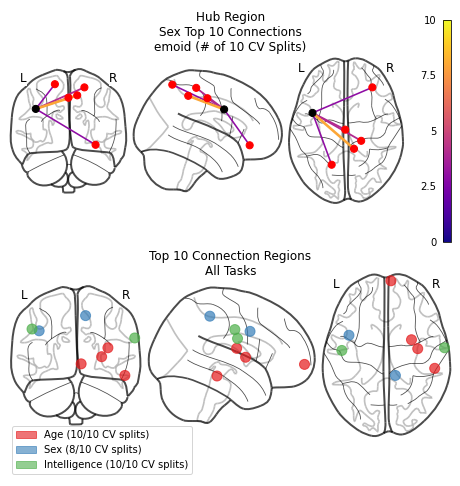

In [3]:
import matplotlib.pyplot as plt
import nilearn.plotting as niplt
import matplotlib.patches as mpatches
import numpy as np

fig, ax = plt.subplots(2,1,figsize=(8,10))

# Nback
# 2, 124
# 2, 156
# 106, 124

# Emoid
# Top 10
# 186, 202
# 136, 202
# 14, 186
# 131, 202
# 27, 186
# 186, 262
# 12, 186
# Top 50
# 202, 257
# 93, 136
# 15, 243

r186 = (-41,6,33)
r202 = (11,-39,50)
r136 = (-46,31,-13)
r14 = (0,-15,47)
r131 = (-31,19,-19)
r27 = (20,-29,60)
r262 = (-17,-59,64)
r12 = (34,38,-12)
r257 = (25,-58,60)
r93 = (-2,-37,44)
r15 = (10,-2,45)
r243 = (-32,-55,-25)

nodes = np.array([r186,r202,r136,r14,r131,r27,r262,r12,r257,r93,r15,r243])
nodes = np.array([r186,r202,r14,r27,r262,r12])
A = np.zeros((nodes.shape[0],nodes.shape[0]))
# A[0,1] = 8
# # A[1,2] = 4
# A[0,3] = 4
# # A[4,1] = 4
# A[5,0] = 4
# A[0,6] = 3
# A[7,0] = 3
# # A[1,8] = 4
# # A[9,2] = 4
# # A[10,11] = 4
A[0,1] = 8
# A[1,2] = 4
A[0,2] = 4
# A[4,1] = 4
A[3,0] = 4
A[0,4] = 3
A[5,0] = 3
# A[1,8] = 4
# A[9,2] = 4
# A[10,11] = 4

A = A+A.T

cm = plt.get_cmap('plasma')
niplt.plot_connectome(A, nodes, ['black'] + 5*['red'], edge_cmap=cm, axes=ax[0], edge_vmin=0, edge_vmax=10, colorbar=True)
ax[0].set_title('Hub Region\nSex Top 10 Connections\nemoid (# of 10 CV Splits)', y=0.8)
# fig.savefig('../../Work/LatentSim/GenderGlass.png', format='png', bbox_inches='tight')

r42 = (36,-9,14)
r230 = (29,1,4)
r10 = (55,-31,-17)
r74 = (6,67,-4)
r186 = (-41,6,33)
r202 = (11,-39,50)
r41 = (-49,-11,35)
r45 = (66,-8,25)

# A = np.zeros((8,8))
# A[0,1] = 1
# A[2,3] = 1
# A[4,5] = 1
# A[6,7] = 1

# A = A+A.T

red_patch = mpatches.Patch(color='#e41a1c', alpha=0.6, label='Age (10/10 CV splits)')
blue_patch = mpatches.Patch(color='#377eb8', alpha=0.6, label='Sex (8/10 CV splits)')
green_patch = mpatches.Patch(color='#4daf4a', alpha=0.6, label='Intelligence (10/10 CV splits)')

# niplt.plot_connectome(A, [r42,r230,r10,r74,r186,r202,r41,r45], 
#                       node_color=4*['red']+2*['green']+2*['blue'],
#                        axes=ax, colorbar=False, edge_kwargs={'linewidth':2})
box = ax[1].get_position()
box.y0 = box.y0 + 0.1
box.y1 = box.y1 + 0.1
ax[1].set_position(box)
niplt.plot_markers([1,1,1,1,2,2,3,3], [r42,r230,r10,r74,r186,r202,r41,r45], 
                      node_vmin=1, node_vmax=9, node_cmap='Set1',
                       axes=ax[1], colorbar=False)
ax[1].set_title('Top 10 Connection Regions\nAll Tasks',y=0.8)
ax[1].legend(handles=[red_patch, blue_patch, green_patch], loc='lower left')
fig.show()
fig.savefig('../../Work/LatentSim/Final/FigureBrainRegions.png', bbox_inches='tight')

In [61]:
import scipy.stats as stats
import numpy as np

ageSim30 = [35.72149277,
40.06446075,
32.69433212,
32.911129,
35.06188202,
34.23825836,
34.62994766,
34.87309265,
27.44874954,
36.37358093]

ageGcn30 = [50.67699814,
48.08184814,
44.49808884,
38.84438705,
49.7107048,
44.83017731,
49.66960526,
50.03013229,
45.03770447,
46.4391098
]

ageSim496 = [24.16612053,
29.0734024,
23.95942879,
22.89538765,
22.75530815,
22.35276604,
25.39627457,
28.25923729,
22.3659935,
25.33605194
]

ageGcn496 = [27.125597,
30.81315804,
23.90501595,
23.33172417,
24.05996513,
23.89562988,
25.32444382,
29.63874817,
25.05971909,
25.77126503
]

genSim30 = [0.6451612711,
0.4354838729,
0.580645144,
0.6129032373,
0.661290288,
0.580645144,
0.4032257795,
0.5,
0.5645161271,
0.5645161271]

genMlp30 = [0.5967741609,
0.5161290169,
0.6290322542,
0.4838709533,
0.580645144,
0.580645144,
0.4032257795,
0.5,
0.4838709533,
0.5645161271]

genSim496 = [0.8870967627,
0.8225806355,
0.8064515591,
0.8709677458,
0.8064515591,
0.8387096524,
0.7903225422,
0.7741935253,
0.8709677458,
0.7903225422]

genMlp496 = [0.9032257795,
0.8064515591,
0.7903225422,
0.7741935253,
0.8548386693,
0.8064515591,
0.7903225422,
0.7419354916,
0.8225806355,
0.7419354916]

wratGcn30 = [13.30577087,
17.01195526,
14.18991756,
17.36501122,
16.07628632,
17.17555046,
16.80088806,
17.29609299,
15.96054554,
17.70549965]

wratSim30 = [13.32756615,
15.67074585,
12.68851471,
16.64726257,
14.44376278,
16.14273262,
16.60938644,
16.46816635,
16.87401581,
16.98545074]

wratSim496 = [12.8944788,
13.2370348,
11.35217476,
15.08037472,
13.52580929,
14.25751019,
15.99057579,
15.01676083,
15.31585693,
15.91049767]

wratGcn496 = [12.55254364,
13.43535233,
12.0896101,
15.11726284,
14.08412266,
14.23937607,
16.18399048,
15.30585384,
14.9908762,
15.80074501]

stats.ttest_rel(wratSim496, wratGcn496)

Ttest_relResult(statistic=-1.1005230862256379, pvalue=0.29966677091920735)

In [72]:
import numpy as np

a = np.random.normal(size=10000)
b = np.random.normal(size=10000)

np.std((a-b)**2)**2

8.119968101886226